In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt

In [2]:
train_set = pd.read_csv('data/train.csv')

X = train_set.drop("label", axis=1)
y = train_set['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [3]:
model = svm.SVC()

# model.fit(X_train, y_train)

In [4]:
%%time

params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
          {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(model, params, scoring='accuracy')
prep = pd.DataFrame(MinMaxScaler().fit_transform(X_train, y_train))

clf.fit(prep, y_train)

Wall time: 54min 37s


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy')

In [5]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.921 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.873 (+/-0.005) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.941 (+/-0.006) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.918 (+/-0.002) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.952 (+/-0.008) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.933 (+/-0.004) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.953 (+/-0.006) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.934 (+/-0.005) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.921 (+/-0.008) for {'C': 1, 'kernel': 'linear'}
0.913 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
0.911 (+/-0.008) for {'C': 100, 'kernel': 'linear'}
0.911 (+/-0.008) for {'C': 1000, 'kernel': 'linear'}


[5]


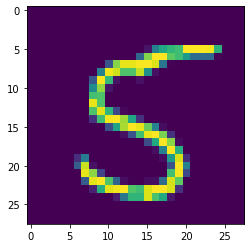

[8]


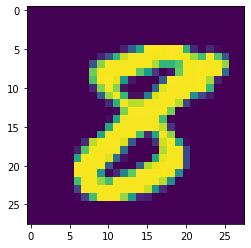

[9]


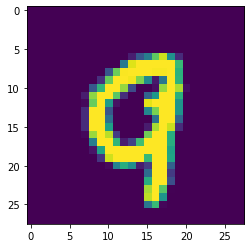

[5]


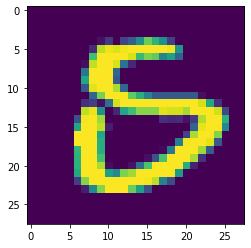

[5]


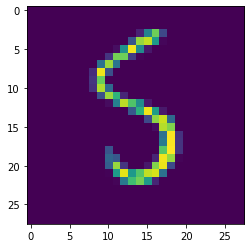

[4]


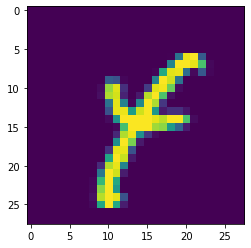

[3]


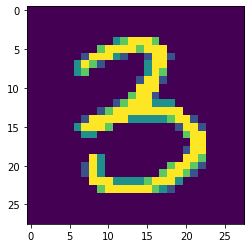

[6]


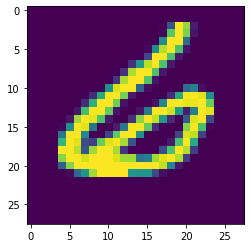

[8]


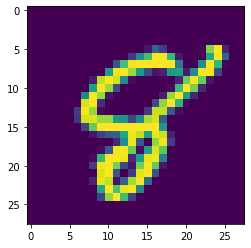

[6]


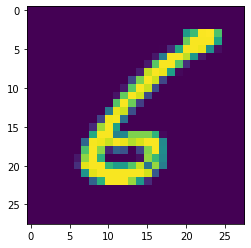

In [6]:
model = make_pipeline(MinMaxScaler(), clf.best_estimator_)
model.fit(X_train, y_train)

for _ in range(10):
    arr = X_test.sample()
    print(model.predict(arr))
    arr = arr.to_numpy()[0].reshape((28,28))
    plt.imshow(arr, interpolation='nearest')
    plt.show()


In [18]:
%%time

model = make_pipeline(MinMaxScaler(), clf.best_estimator_)
model.fit(X, y)

test_set = pd.read_csv("data/test.csv")
results = pd.DataFrame(pd.Series(model.predict(test_set), name='label'))

Wall time: 4min 15s


In [19]:
results.index.name = 'ImageId'
results.index += 1
results.to_csv("data/results.csv")
